In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('team_performance_dataset_2008to2024.csv')

In [6]:
data.head(5)

,Match_ID,Date,Teams,Venue,Toss_Winner,Toss_Decision,Match_Winner,Win_Type,Win_Margin,First_Innings_Score,Second_Innings_Score,Player_of_Match,Umpire,Umpire1,Umpire2,Powerplay_Scores,Middle_Overs_Scores,Death_Overs_Scores
0,335982,2008-04-18,Royal Challengers Bangalore vs Kolkata Knight ...,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,222,82.0,BB McCullum,Asad Rauf,RE Koertzen,J Srinath,61,97,64
1,335983,2008-04-19,Kings XI Punjab vs Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,240,207.0,MEK Hussey,MR Benson,SL Shastri,S Venkataraghavan,53,116,71
2,335984,2008-04-19,Delhi Daredevils vs Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,129,132.0,MF Maharoof,Aleem Dar,GA Pratapkumar,GR Viswanath,40,66,23
3,335985,2008-04-20,Mumbai Indians vs Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,165,166.0,MV Boucher,SJ Davis,DJ Harper,J Srinath,47,71,47
4,335986,2008-04-20,Kolkata Knight Riders vs Deccan Chargers,Eden Gardens,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,110,112.0,DJ Hussey,BF Bowden,K Hariharan,FM Engineer,39,43,28


In [8]:
data.shape

(1073, 18)

In [10]:
data.columns

Index(['Match_ID', 'Date', 'Teams', 'Venue', 'Toss_Winner', 'Toss_Decision',
       'Match_Winner', 'Win_Type', 'Win_Margin', 'First_Innings_Score',
       'Second_Innings_Score', 'Player_of_Match', 'Umpire', 'Umpire1',
       'Umpire2', 'Powerplay_Scores', 'Middle_Overs_Scores',
       'Death_Overs_Scores'],
      dtype='object')

In [12]:
#Checking the % of the total null values in the dataset
data.isna().mean()*100

Match_ID                0.000000
Date                    0.000000
Teams                   0.000000
Venue                   0.000000
Toss_Winner             0.000000
Toss_Decision           0.000000
Match_Winner            0.000000
Win_Type                1.770736
Win_Margin              1.770736
First_Innings_Score     0.000000
Second_Innings_Score    0.279590
Player_of_Match         0.465983
Umpire                  0.000000
Umpire1                 0.000000
Umpire2                 0.000000
Powerplay_Scores        0.000000
Middle_Overs_Scores     0.000000
Death_Overs_Scores      0.000000
dtype: float64

In [14]:
#Filling the null values in the win_Type column with 'No Result'
data['Win_Type'].fillna('No Result', inplace = True)

In [16]:
#Filling the null values in the Win_Margin column with 0
data['Win_Margin'].fillna(0, inplace = True)

In [18]:
#Dropping the rows of the null values of Second_Innings_Score .
data.dropna(subset ='Second_Innings_Score', inplace = True)

In [20]:
#Filling the null values in the Player_of_match with 'NoPlayer'.
data['Player_of_Match'].fillna("No Player", inplace = True)

In [22]:
#Checking if my dataset contains any null values.
data.duplicated().sum()

0

In [24]:
#Converting the Date column to Datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [26]:
#Creating a Year column from the Date column
data['Year'] = data['Date'].dt.year

## Outliers

<Axes: >

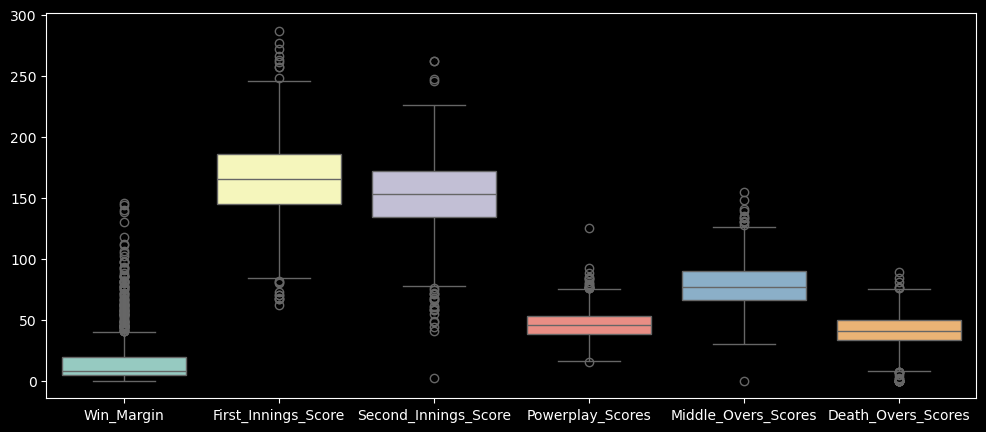

In [84]:
plt.figure(figsize = (12,5))
sns.boxplot(data[['Win_Margin','First_Innings_Score', 'Second_Innings_Score', 'Powerplay_Scores', 'Middle_Overs_Scores', 'Death_Overs_Scores']])

# <font color = 'green'> Univariate Analysis</font>

### Histogram to get frequency for total match winnings by each team.

In [30]:
#Changing the name of the team
data.loc[data['Match_Winner'] == 'Royal Challengers Bengaluru', 'Match_Winner'] = 'Royal Challengers Bangalore'
data.loc[data['Match_Winner'] == 'Rising Pune Supergiant', 'Match_Winner'] = 'Rising Pune Supergiants'

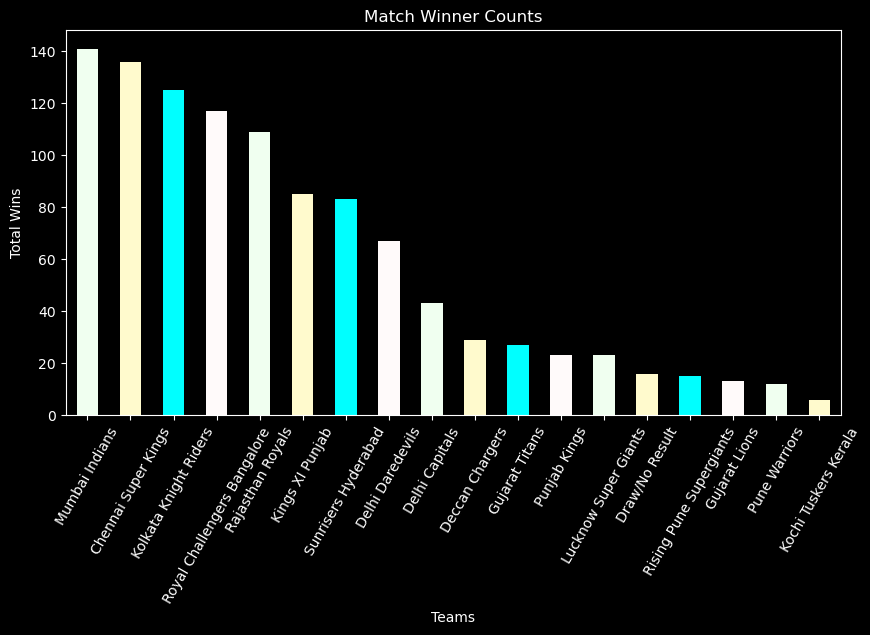

In [40]:
# Plotting a histogram for total match winnings by each team.
winning = data['Match_Winner'].value_counts()
plt.style.use('dark_background')
plt.figure(figsize = (10,5))
c = data['Match_Winner'].nunique()
colors = ['honeydew','lemonchiffon','cyan','snow']
winning.plot(kind = 'bar',color = colors)
plt.title('Match Winner Counts')
plt.xlabel('Teams')
plt.ylabel('Total Wins')
plt.xticks(rotation = 60)
plt.show()

### Piechart to get distribution of IPL Match Wins by Teams (2008-2024)

<Axes: ylabel='count'>

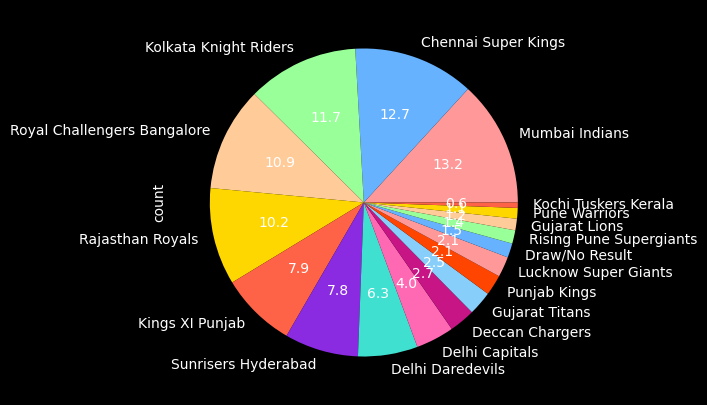

In [42]:
plt.figure(figsize = (10,5))
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#FF6347',
          '#8A2BE2', '#40E0D0', '#FF69B4', '#C71585', '#87CEFA', '#FF4500']
data["Match_Winner"].value_counts().plot(kind = 'pie',autopct = '%.1f',  colors = colors)

### Histplot(kde) to get the Distribution and Frequency of First and Second Innings Scores. 

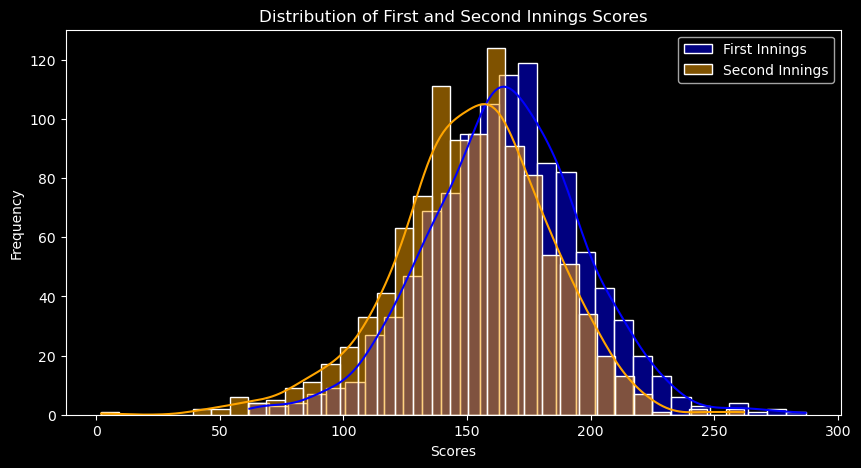

In [44]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
sns.histplot(data['First_Innings_Score'], kde=True, color='blue', label='First Innings')
sns.histplot(data['Second_Innings_Score'], kde=True, color='orange', label='Second Innings')
plt.title('Distribution of First and Second Innings Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Bar chart to find how many matches played in each Venue

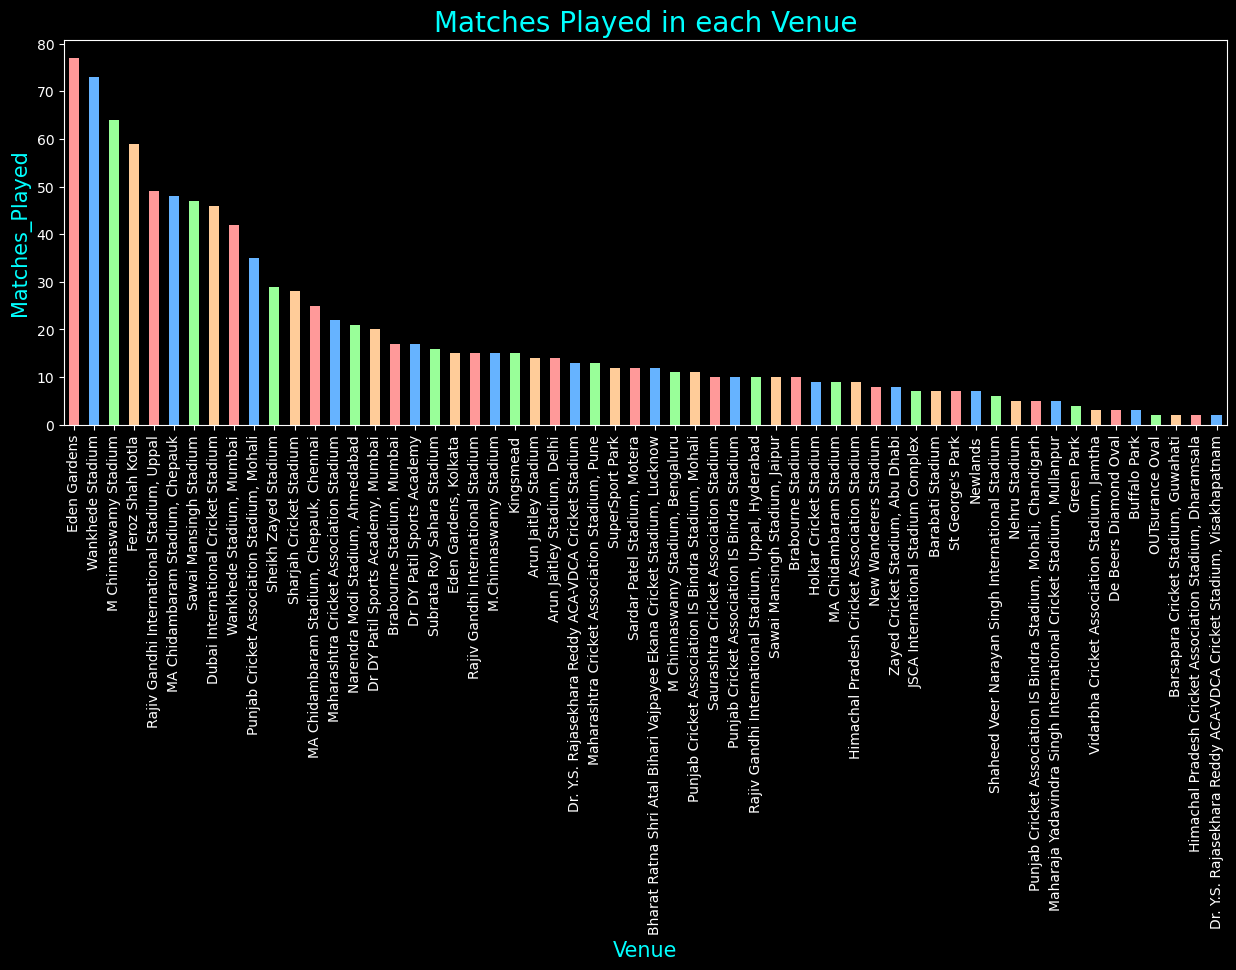

In [50]:
Match_Venue = data['Venue'].value_counts()
plt.style.use('dark_background')
plt.figure(figsize = (15,5))
plt.style.use('seaborn-v0_8-dark-palette')
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'] 
Match_Venue.plot(kind = 'bar', color = colors)
plt.title('Matches Played in each Venue',size = 20,color = 'cyan')
plt.xlabel('Venue', size = 15, color = 'cyan')
plt.ylabel('Matches_Played', size = 15, color = 'cyan')
plt.xticks(rotation = 90)
plt.show()

### Histogram subplots for the Powerplay_scores, Middle_over_scores, Death_overs_scores

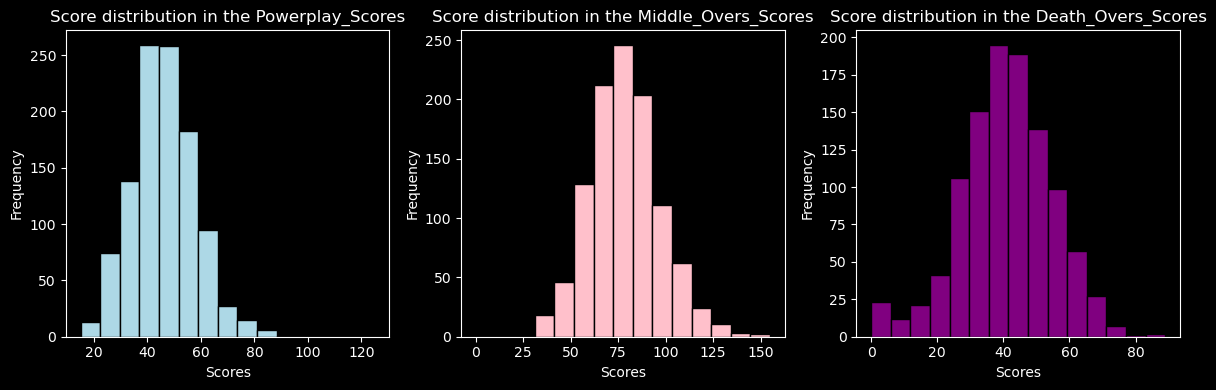

In [25]:
plt.figure(figsize = (12,4))
plt.subplot(1,3,1)
plt.hist(data['Powerplay_Scores'], bins = 15, color = 'lightblue', edgecolor = 'black')
plt.title("Score distribution in the Powerplay_Scores")
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.subplot(1,3,2)
plt.hist(data['Middle_Overs_Scores'], bins = 15, color = 'pink', edgecolor = 'black')
plt.title('Score distribution in the Middle_Overs_Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.subplot(1,3,3)
plt.hist(data['Death_Overs_Scores'], bins = 15, color = 'purple', edgecolor = 'black')
plt.title("Score distribution in the Death_Overs_Scores")
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### CountPlot for umpiring statistics.

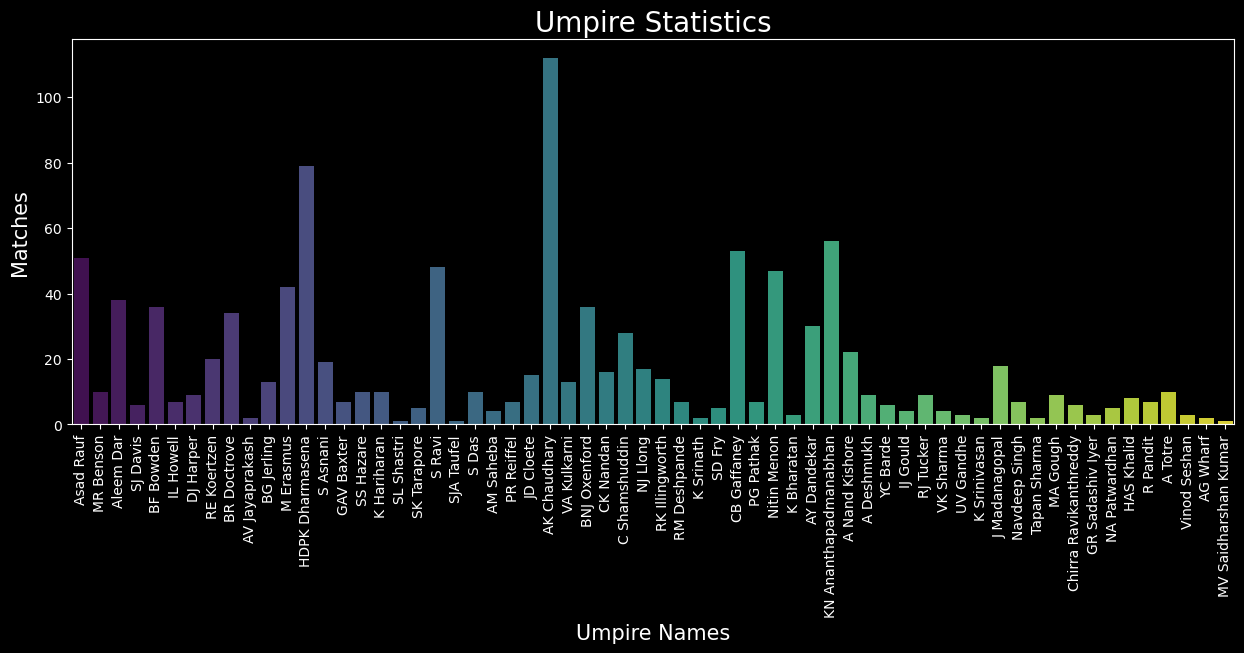

In [52]:
plt.style.use('dark_background')
plt.figure(figsize = (15,5))
sns.countplot(data = data, x = 'Umpire',palette = 'viridis')
plt.xticks(rotation = 90)
plt.title('Umpire Statistics', size = 20)
plt.xlabel("Umpire Names", size = 15)
plt.ylabel("Matches", size = 15)
plt.show()   

### Bar chart to get the Top 10 players who have won most of the M.O.M awards

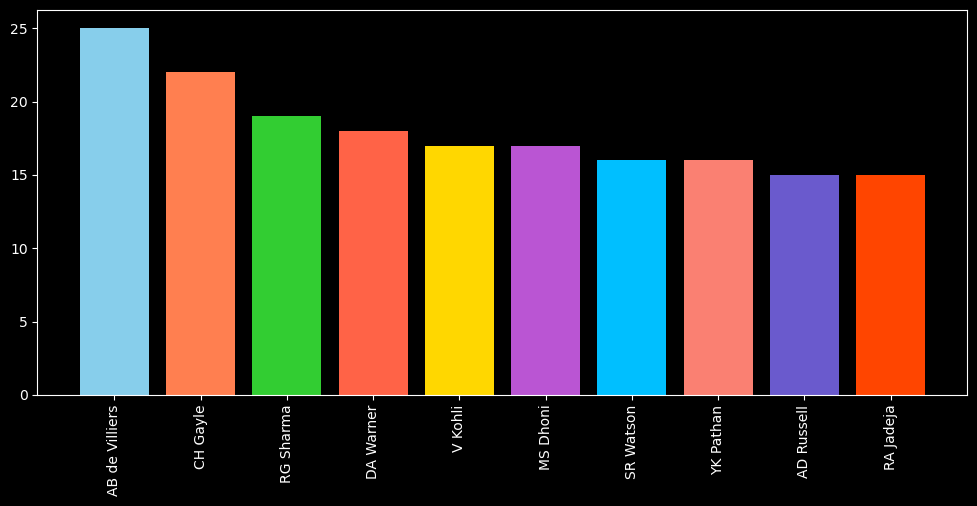

In [29]:
plt.figure(figsize = (12,5))
plt.style.use('dark_background')
c = ['#87CEEB', '#FF7F50', '#32CD32','#FF6347', '#FFD700', '#BA55D3', '#00BFFF','#FA8072', '#6A5ACD', '#FF4500']
plt.bar(data['Player_of_Match'].value_counts()[0:10].keys(),data['Player_of_Match'].value_counts()[0:10],color = c)
plt.xticks(rotation = 90)
plt.show()

# <font color = 'green'> Bivariate Analysis </font>

### Which team has won more tosses and chooses what.

In [57]:
data.loc[data['Toss_Decision'] == 'Royal Challengers Bengaluru', 'Toss_Decision'] = 'Royal Challengers Bangalore'
data.loc[data['Toss_Decision'] == 'Rising Pune Supergiant', 'Toss_Decision'] = 'Rising Pune Supergiants'
data.loc[data['Toss_Winner'] == 'Royal Challengers Bengaluru', 'Toss_Winner'] = 'Royal Challengers Bangalore'
data.loc[data['Toss_Winner'] == 'Rising Pune Supergiant', 'Toss_Winner'] = 'Rising Pune Supergiants'

In [59]:
Total_Toss_Winner = data['Toss_Winner'].value_counts()
Total_Toss_Winner

Toss_Winner
Mumbai Indians                 139
Kolkata Knight Riders          122
Royal Challengers Bangalore    120
Chennai Super Kings            119
Rajasthan Royals               114
Kings XI Punjab                 85
Sunrisers Hyderabad             85
Delhi Daredevils                79
Delhi Capitals                  49
Deccan Chargers                 43
Gujarat Titans                  22
Punjab Kings                    21
Pune Warriors                   20
Lucknow Super Giants            16
Gujarat Lions                   15
Rising Pune Supergiants         13
Kochi Tuskers Kerala             8
Name: count, dtype: int64

### Stacked bar plot to get Toss Decision by Team after Winning Toss

In [61]:
x = pd.crosstab(data['Toss_Winner'], data['Toss_Decision'])

<Figure size 1000x1000 with 0 Axes>

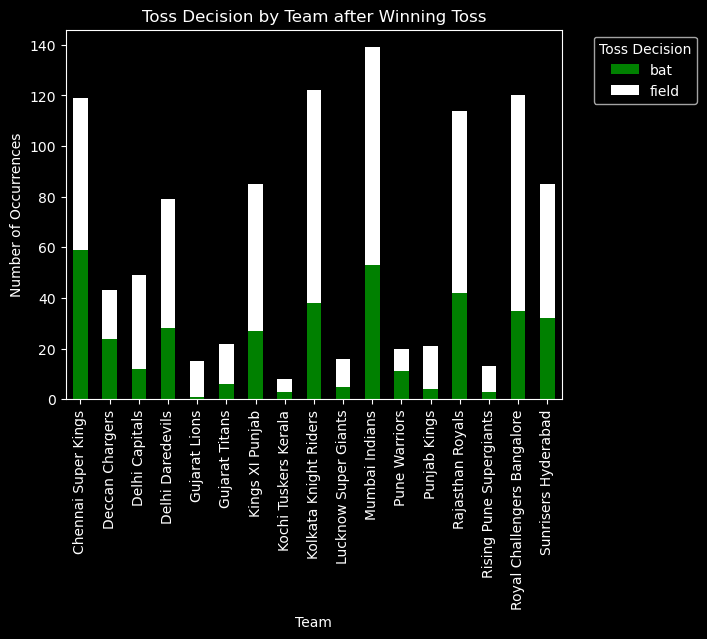

In [185]:
plt.figure(figsize=(10, 10))  # Increased size of the plot
x.plot(kind='bar', stacked=True, cmap='ocean')
plt.title('Toss Decision by Team after Winning Toss')
plt.xlabel('Team')
plt.ylabel('Number of Occurrences')
plt.legend(title='Toss Decision', bbox_to_anchor=(1.05, 1))
plt.show()

In [36]:
data['Player_of_Match'].value_counts().head()

Player_of_Match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
DA Warner         18
V Kohli           17
Name: count, dtype: int64

In [37]:
data.head(3)

,Match_ID,Date,Teams,Venue,Toss_Winner,Toss_Decision,Match_Winner,Win_Type,Win_Margin,First_Innings_Score,Second_Innings_Score,Player_of_Match,Umpire,Umpire1,Umpire2,Powerplay_Scores,Middle_Overs_Scores,Death_Overs_Scores,Year
0,335982,2008-04-18,Royal Challengers Bangalore vs Kolkata Knight ...,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,222,82.0,BB McCullum,Asad Rauf,RE Koertzen,J Srinath,61,97,64,2008
1,335983,2008-04-19,Kings XI Punjab vs Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,240,207.0,MEK Hussey,MR Benson,SL Shastri,S Venkataraghavan,53,116,71,2008
2,335984,2008-04-19,Delhi Daredevils vs Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,129,132.0,MF Maharoof,Aleem Dar,GA Pratapkumar,GR Viswanath,40,66,23,2008


### Pie chart to get Proportion of Wins by Teams after Batting First

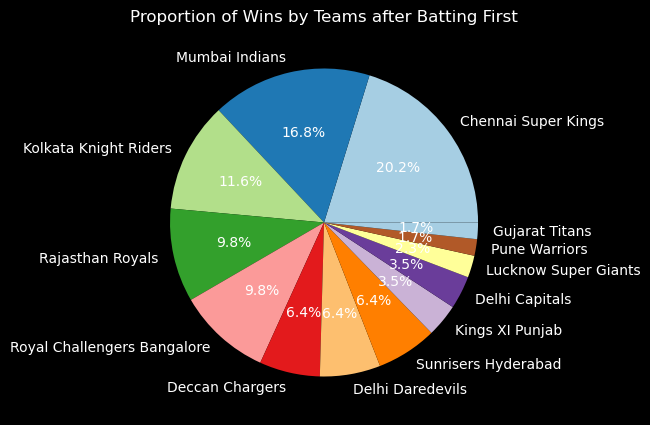

In [70]:
data['Bat_First'] = np.where(data['Toss_Decision'] == 'bat', data['Toss_Winner'], 'Other Team')
bat_first_wins = data[data['Bat_First'] == data['Match_Winner']]
team_wins_bat_first = bat_first_wins['Match_Winner'].value_counts()
plt.figure(figsize=(10,5))
team_wins_bat_first.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Proportion of Wins by Teams after Batting First')
plt.ylabel("")
plt.show()

### Pie chart to get Proportion of Wins by Teams after Bowling 

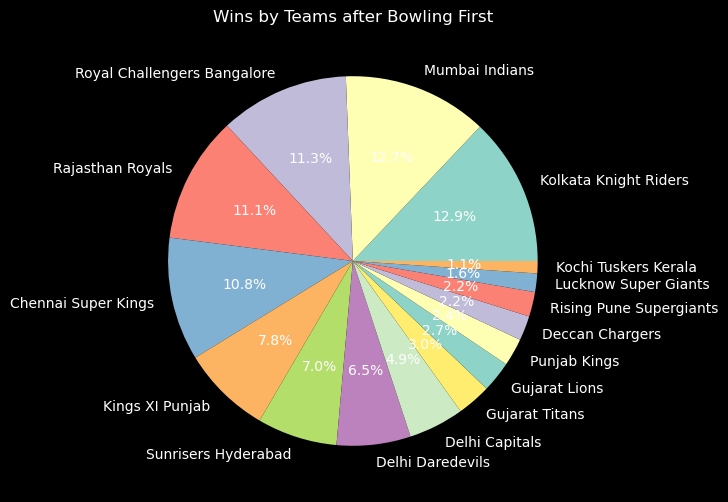

In [41]:
data['Bowl_First'] = np.where(data['Toss_Decision'] == 'field', data['Toss_Winner'], 'Other Team')
bowl_first_wins = data[data['Bowl_First'] == data['Match_Winner']]
team_wins_bowl_first = bowl_first_wins['Match_Winner'].value_counts()
plt.figure(figsize=(12,6))
team_wins_bowl_first.plot(kind='pie', autopct='%1.1f%%', color=plt.cm.Paired.colors)
plt.title('Wins by Teams after Bowling First')
plt.ylabel("")
plt.show()

### Countplot to find the Toss Decision depeding on the Venue.

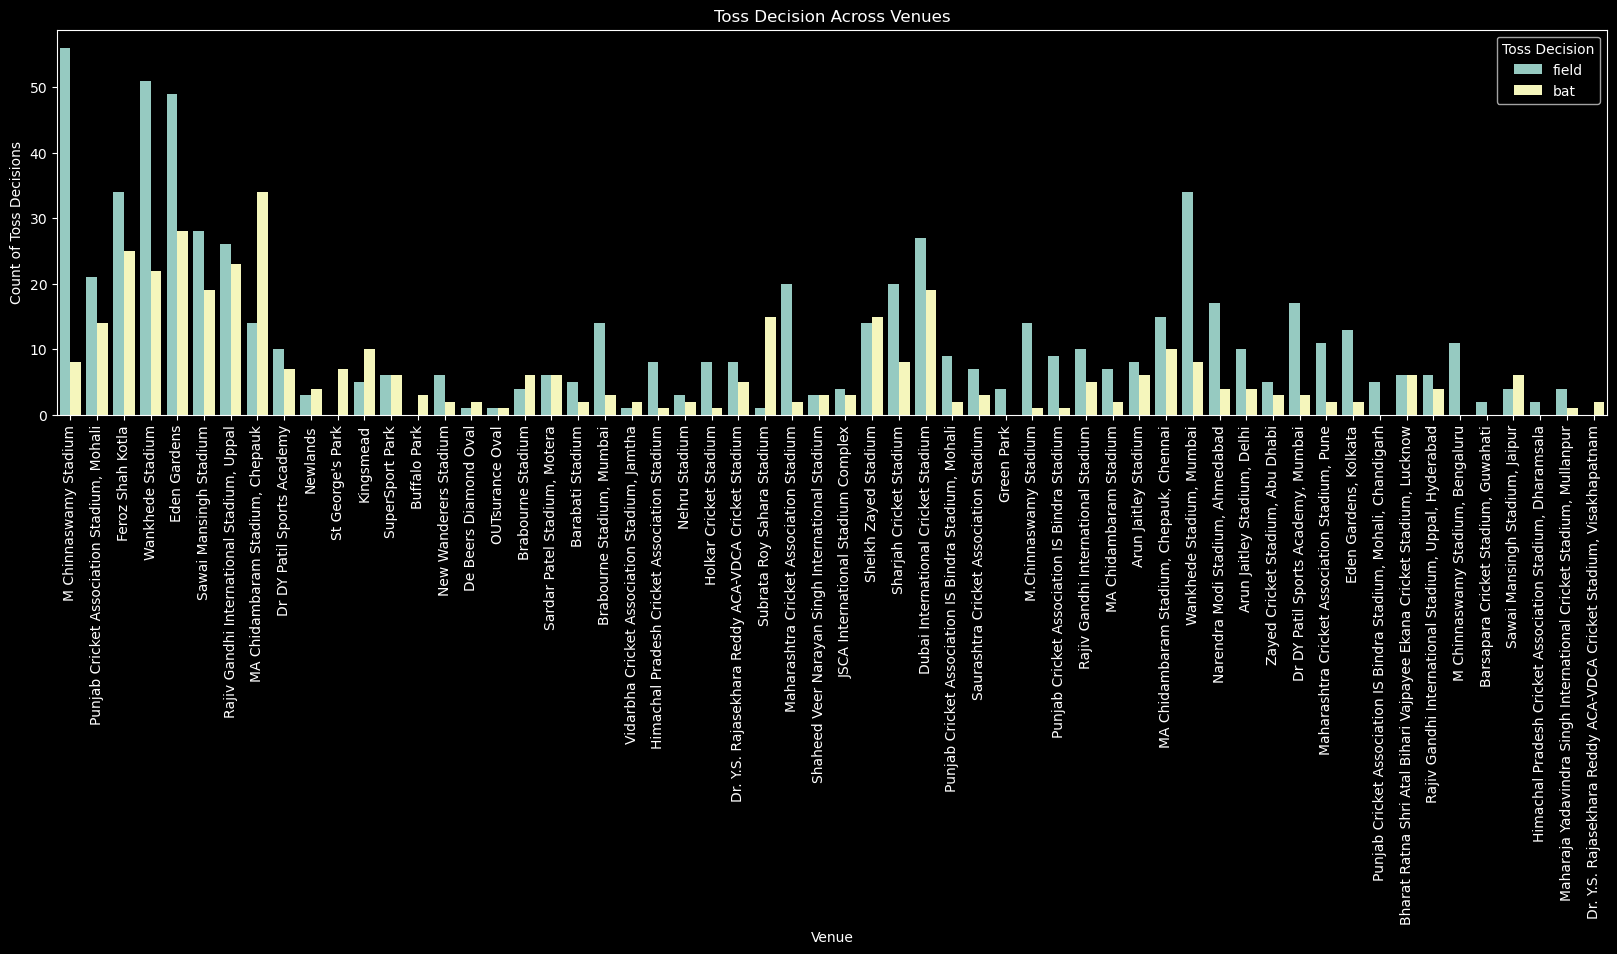

In [72]:
# Multivariate Analysis 1: Toss Decision, Venue, and Match Outcome
plt.figure(figsize=(20, 5))
sns.countplot(data, x="Venue", hue="Toss_Decision")
plt.title("Toss Decision Across Venues")
plt.xlabel("Venue")
plt.ylabel("Count of Toss Decisions")
plt.xticks(rotation=90)
plt.legend(title="Toss Decision")
plt.show()

In [43]:
avg_scores = data.groupby("Year")[["First_Innings_Score", "Second_Innings_Score"]].mean().reset_index()
avg_scores

,Year,First_Innings_Score,Second_Innings_Score
0,2008,160.965517,148.293103
1,2009,150.263158,136.052632
2,2010,164.783333,149.616667
3,2011,153.708333,139.319444
4,2012,157.540541,145.878378
5,2013,155.894737,140.697368
6,2014,163.066667,152.083333
7,2015,165.672414,146.948276
8,2016,162.600000,151.766667
9,2017,165.779661,152.338983


### Line Plot of Average First and Second Innings Scores Over the Years

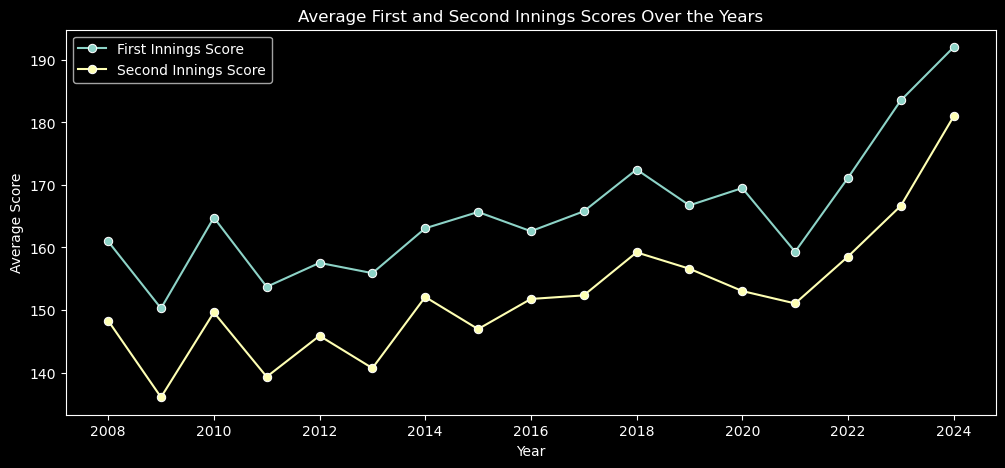

In [74]:
# Calculate average scores per year
avg_scores = data.groupby("Year")[["First_Innings_Score", "Second_Innings_Score"]].mean().reset_index()
plt.figure(figsize=(12, 5))
sns.lineplot(data=avg_scores, x="Year", y="First_Innings_Score", label="First Innings Score", marker="o")
sns.lineplot(data=avg_scores, x="Year", y="Second_Innings_Score", label="Second Innings Score", marker="o")
plt.title("Average First and Second Innings Scores Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.legend()
plt.show()


# <font color = 'green'> Multivariate Analysis </font>

### Heatmap for finding the correlation between first_Innings_score, Second_Innings_Score, Powerplay_scores, middle_over_score, death_over_scores, win_margin

<Axes: >

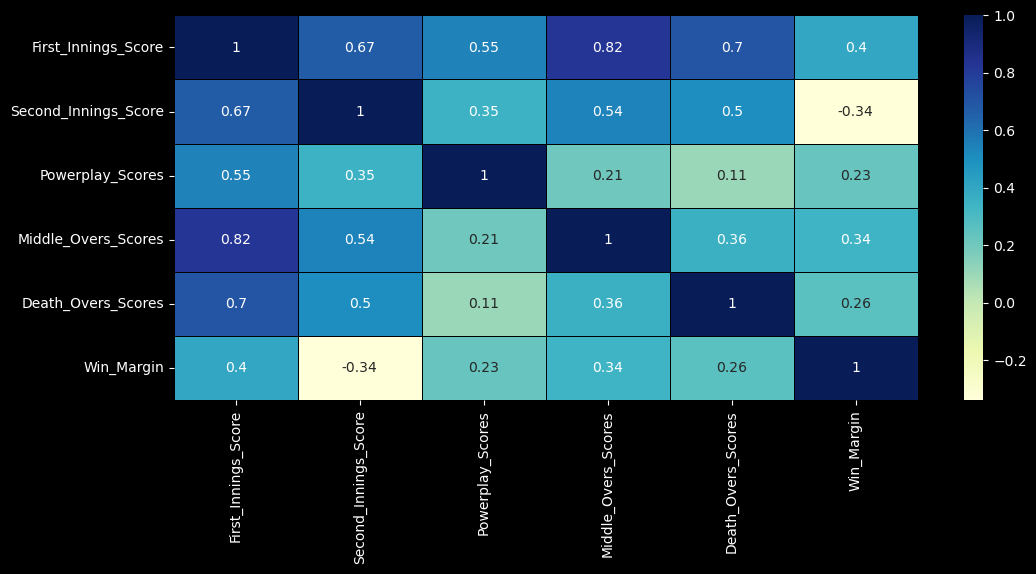

In [118]:
plt.figure(figsize = (12,5))
plt.style.use('dark_background')
a = data[['First_Innings_Score', 'Second_Innings_Score', 'Powerplay_Scores', 'Middle_Overs_Scores', 'Death_Overs_Scores', 'Win_Margin']]
sns.heatmap(a.corr(), annot=True, cmap='YlGnBu', linewidths=0.5, linecolor='black')

In [48]:
avg_scores = data.groupby('Year')[['Powerplay_Scores', 'Middle_Overs_Scores', 'Death_Overs_Scores']].mean()
avg_scores

,Powerplay_Scores,Middle_Overs_Scores,Death_Overs_Scores
Year,,,
2008,44.879310,76.706897,39.379310
2009,44.035088,69.210526,37.017544
2010,47.000000,75.716667,42.066667
2011,42.000000,76.125000,35.583333
2012,42.729730,75.797297,39.013514
2013,41.026316,73.421053,41.447368
2014,44.300000,79.533333,39.233333
2015,46.931034,78.224138,40.517241
2016,43.866667,79.250000,39.483333


### Line Plot of Powerplay_scores, Middle_over_scores, Death_over_scores over years.

<Figure size 1200x500 with 0 Axes>

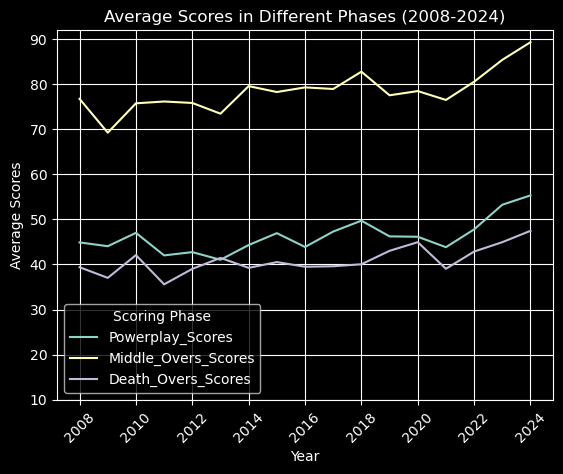

In [78]:
plt.figure(figsize=(12,5))
avg_scores = data.groupby('Year')[['Powerplay_Scores', 'Middle_Overs_Scores', 'Death_Overs_Scores']].mean()
avg_scores.plot()
plt.title('Average Scores in Different Phases (2008-2024)')
plt.xlabel('Year')
plt.ylabel('Average Scores')
plt.xticks(rotation=45)
plt.grid()
plt.ylim(10, None)
plt.legend(title='Scoring Phase')
plt.show()